In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, datetime, time
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [53]:
pd.set_option('display.max_columns', 300)

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
path = 'Track1'

In [5]:
file_list = os.listdir("./"+path)

In [10]:
file_list

['mrc_info.csv', 'samp_cst_feat.csv', 'samp_train.csv', 'variable_dtype.xlsx']

In [6]:
mrc_info = pd.read_csv("./"+path+"/"+file_list[0],index_col=0,encoding='euc-kr')

In [370]:
mrc_info

,Category
MRC_ID_DI,
0,미이용
1,홈쇼핑
2,종합물
3,종합몰
4,전문몰
5,종합몰
6,홈쇼핑
7,오픈마켓_소셜
8,홈쇼핑


In [7]:
samp_cst_feat = pd.read_csv("./"+path+"/"+file_list[1],encoding='euc-kr')

In [8]:
samp_train = pd.read_csv("./"+path+"/"+file_list[2],encoding='euc-kr')

In [9]:
variable_dtype = pd.read_excel("./"+path+"/"+file_list[3],encoding='euc-kr')

In [11]:
var_col = samp_cst_feat.iloc[:,1:].columns.tolist()
kernel_list = ['rbf','linear','poly']

In [12]:
cate = ['VAR007',
 'VAR015',
 'VAR018',
 'VAR026',
 'VAR059',
 'VAR066',
 'VAR067',
 'VAR070',
 'VAR071',
 'VAR077',
 'VAR078',
 'VAR094',
 'VAR096',
 'VAR097',
 'VAR098',
 'VAR107',
 'VAR111',
 'VAR124',
 'VAR127',
 'VAR143',
 'VAR144',
 'VAR145',
 'VAR148',
 'VAR165',
 'VAR177',
 'VAR179',
 'VAR199',
 'VAR208']
nume = [i for i in samp_cst_feat.columns[1:] if i not in cate]
data = samp_cst_feat[var_col].copy()
r = samp_train['MRC_ID_DI'].apply(lambda x: 0 if x==0 else 1)
ans = samp_train['MRC_ID_DI'].copy()

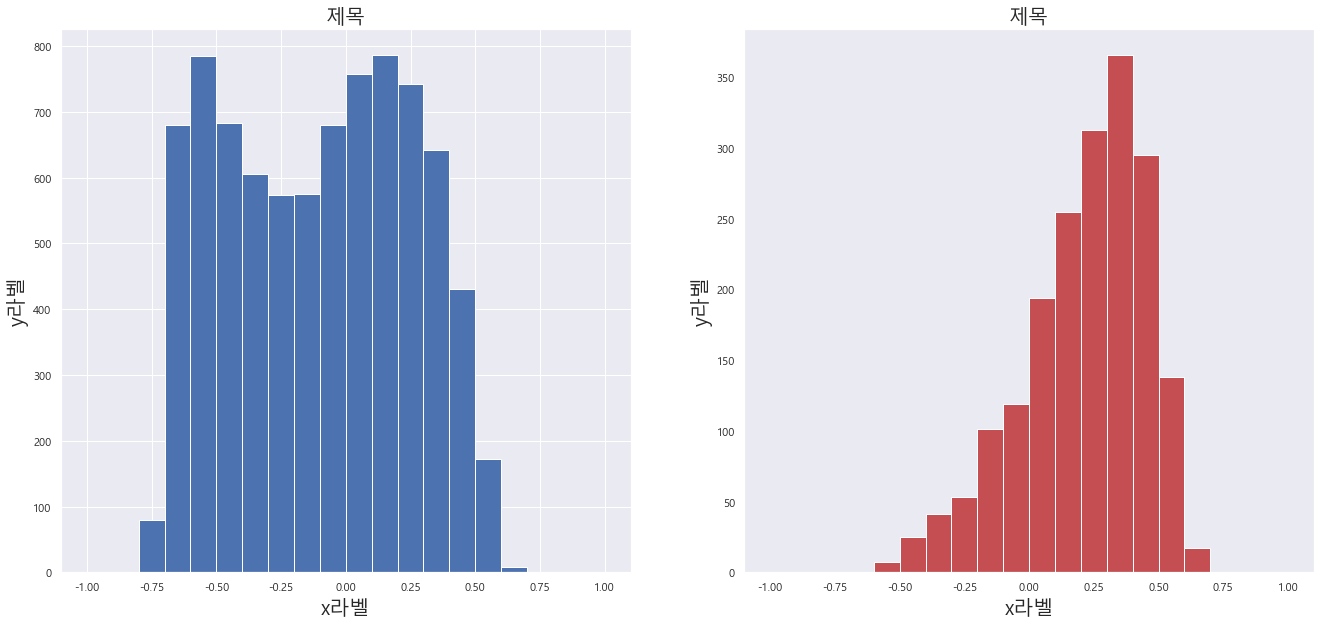

In [55]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(data['VAR222'][r==0],bins=np.arange(-1,1.1,0.1))
plt.title("제목",fontsize=20)
plt.xlabel("x라벨",fontsize=20)
plt.ylabel("y라벨",fontsize=20)
# plt.legend(prop={'size': 30})
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(data['VAR222'][r==1],bins=np.arange(-1,1.1,0.1),color='r')
plt.title("제목",fontsize=20)
plt.xlabel("x라벨",fontsize=20)
plt.ylabel("y라벨",fontsize=20)
# plt.legend(prop={'size': 30})
plt.grid(False)

# plt.savefig('test.jpg')
plt.show()

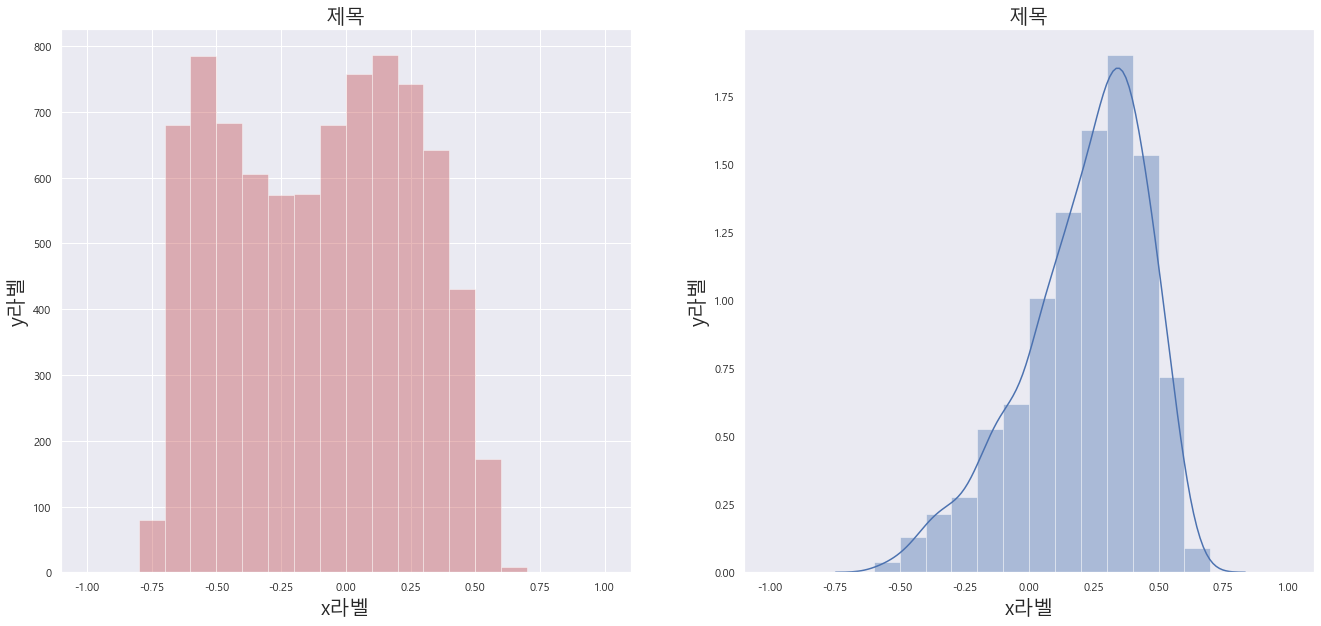

In [66]:
# sns.set()
# plt.style.use('fivethirtyeight')
# %matplotlib inline
plt.figure(figsize=(20,10))
# sns.set_style("darkgrid")
# sns.set(font="AppleGothic",
sns.set(font=font_name,
        rc={"axes.unicode_minus":False},
        style='darkgrid')

plt.subplot(1,2,1)
sns.distplot(data['VAR222'][r==0],bins=np.arange(-1,1.1,0.1),kde=False,color='r')
plt.title("제목",fontsize=20)
plt.xlabel("x라벨",fontsize=20)
plt.ylabel("y라벨",fontsize=20)
plt.grid(True)

plt.subplot(1,2,2)
sns.distplot(data['VAR222'][r==1],bins=np.arange(-1,1.1,0.1),kde=True,color='b')
plt.title("제목",fontsize=20)
plt.xlabel("x라벨",fontsize=20)
plt.ylabel("y라벨",fontsize=20)
plt.grid(False)

# plt.savefig('test.jpg')
plt.show()

# 그래프 스타트

In [174]:
hist_var = """
    VAR150
    VAR138
    VAR029
    VAR076
    VAR013
    VAR202
    VAR043
    VAR080
    VAR187
    VAR126
    VAR051
    VAR122
    VAR222
    VAR095
    VAR219
    VAR153
    VAR157
    VAR104
    VAR115
    VAR226
"""

In [176]:
hist_var = hist_var.split("\n")[1:-1]

In [179]:
hist_var = [i.replace("    ","") for i in hist_var]

In [180]:
hist_var

['VAR150',
 'VAR138',
 'VAR029',
 'VAR076',
 'VAR013',
 'VAR202',
 'VAR043',
 'VAR080',
 'VAR187',
 'VAR126',
 'VAR051',
 'VAR122',
 'VAR222',
 'VAR095',
 'VAR219',
 'VAR153',
 'VAR157',
 'VAR104',
 'VAR115',
 'VAR226']

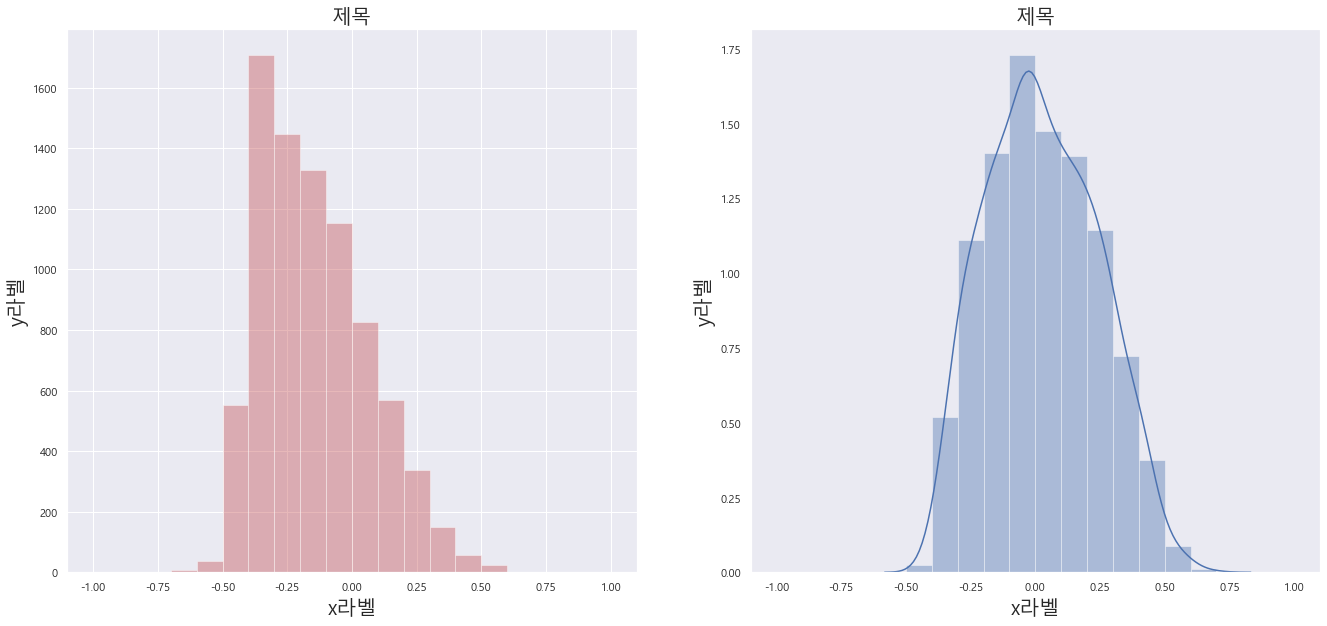

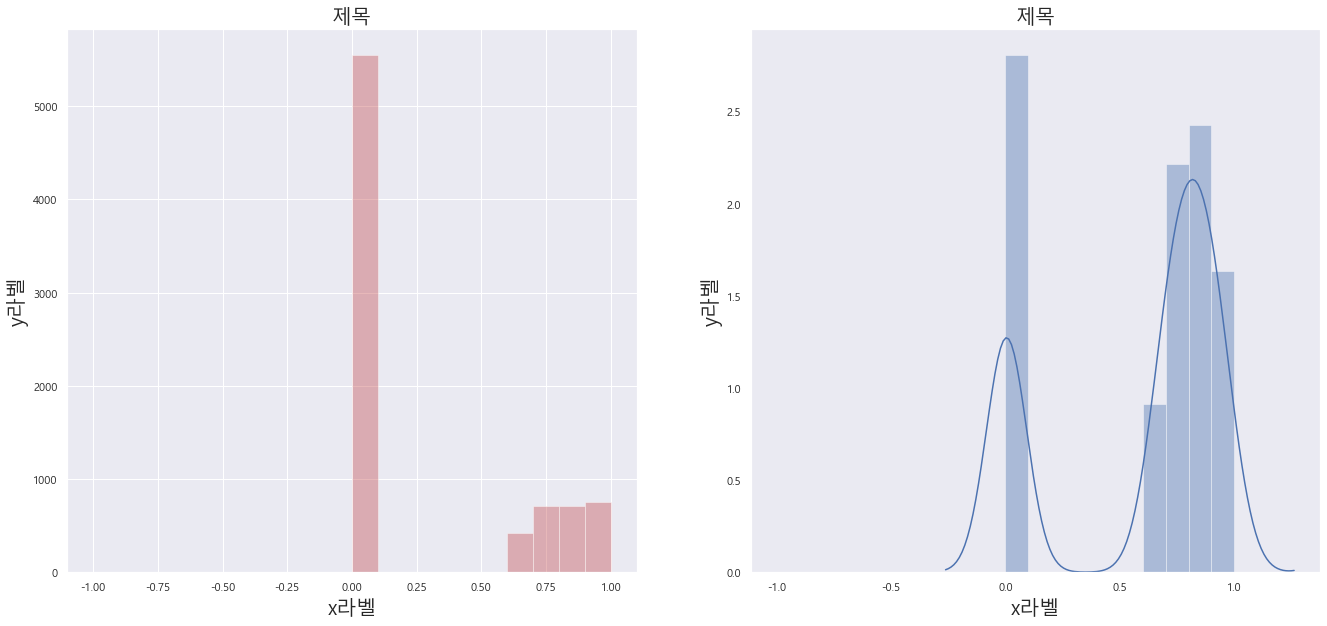

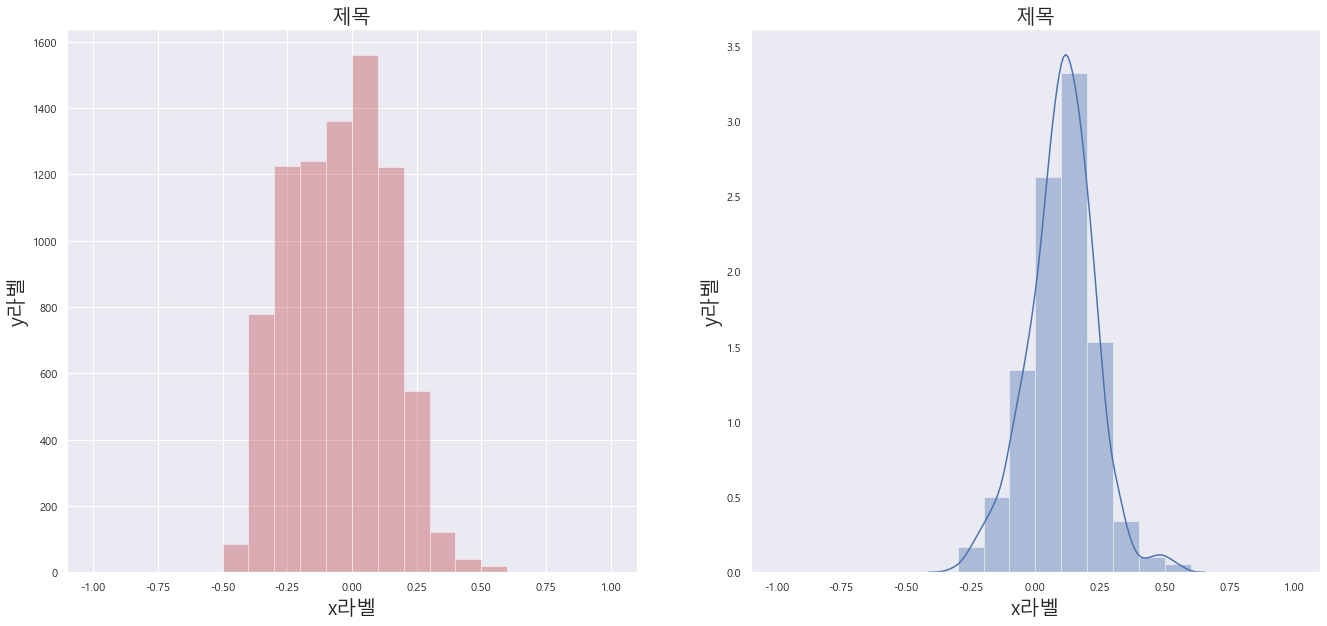

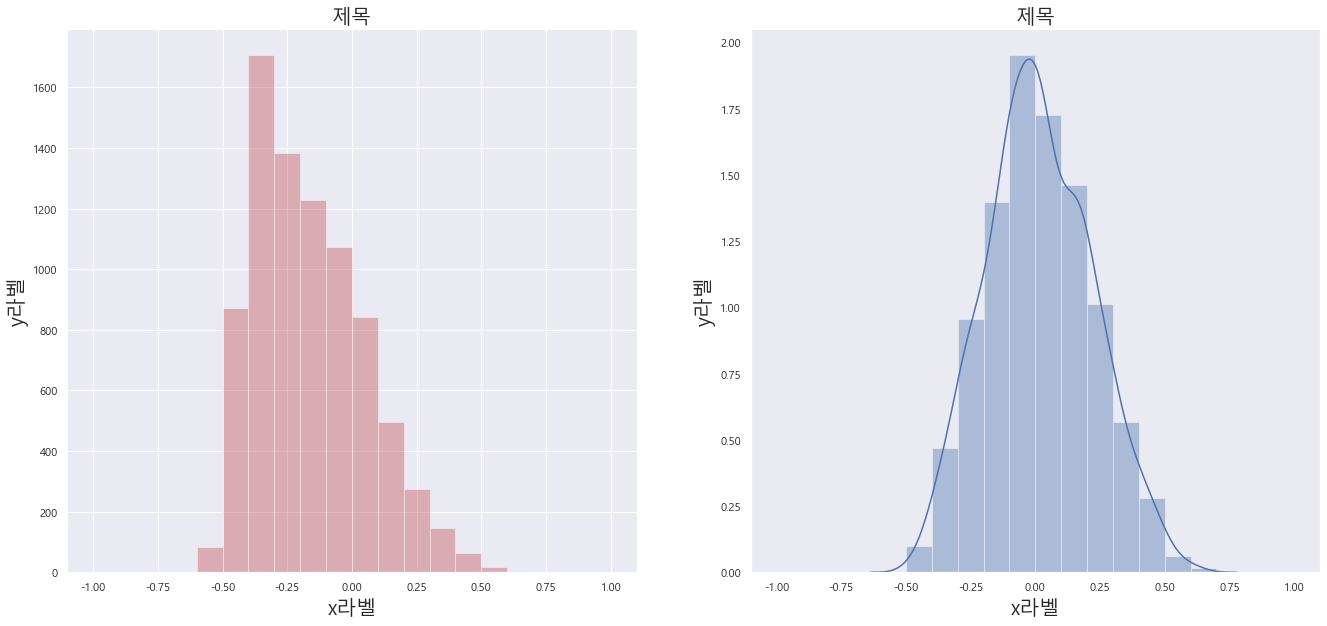

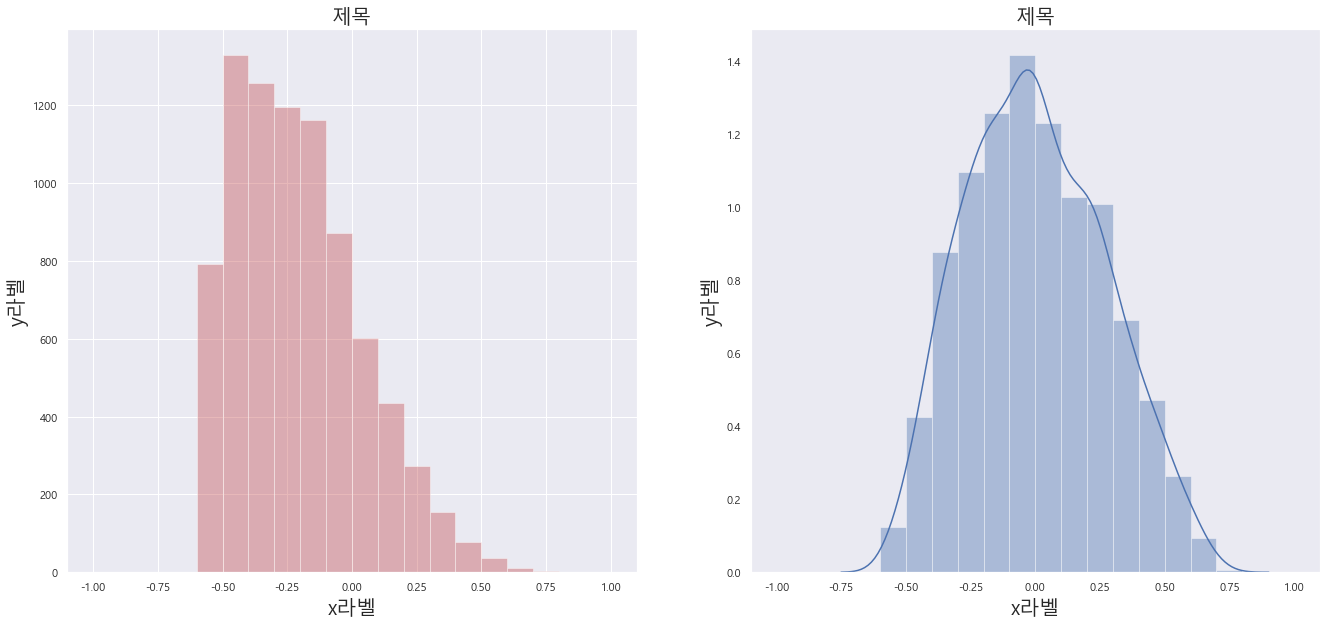

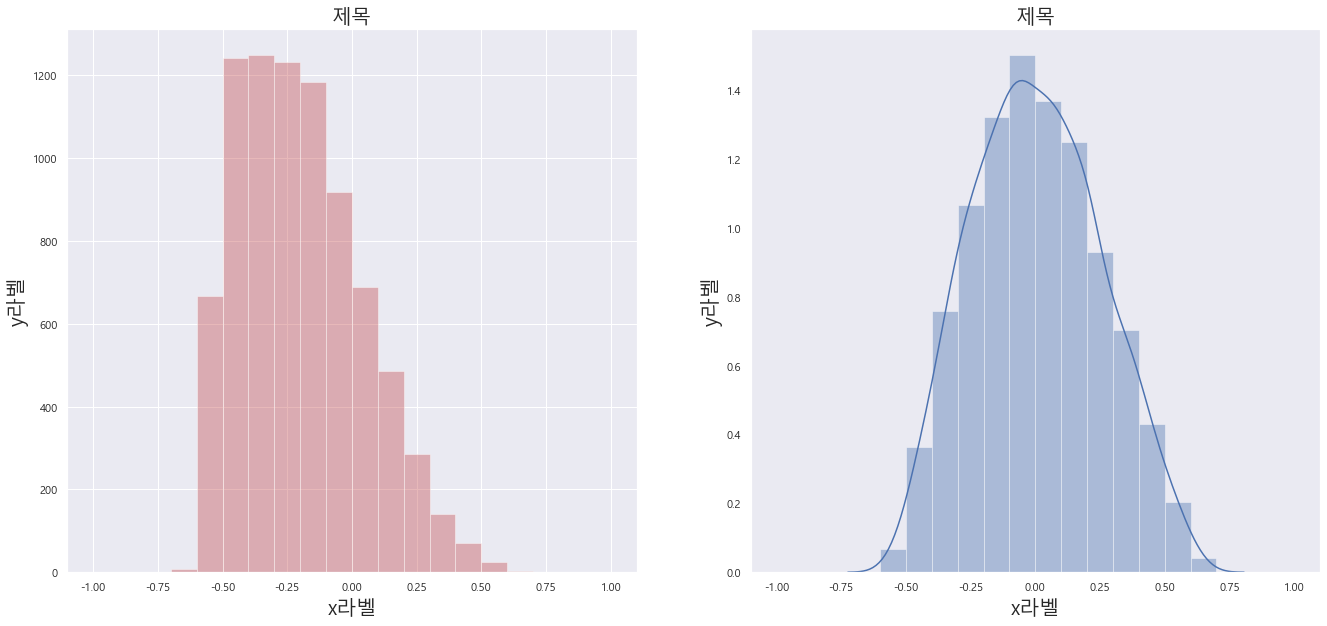

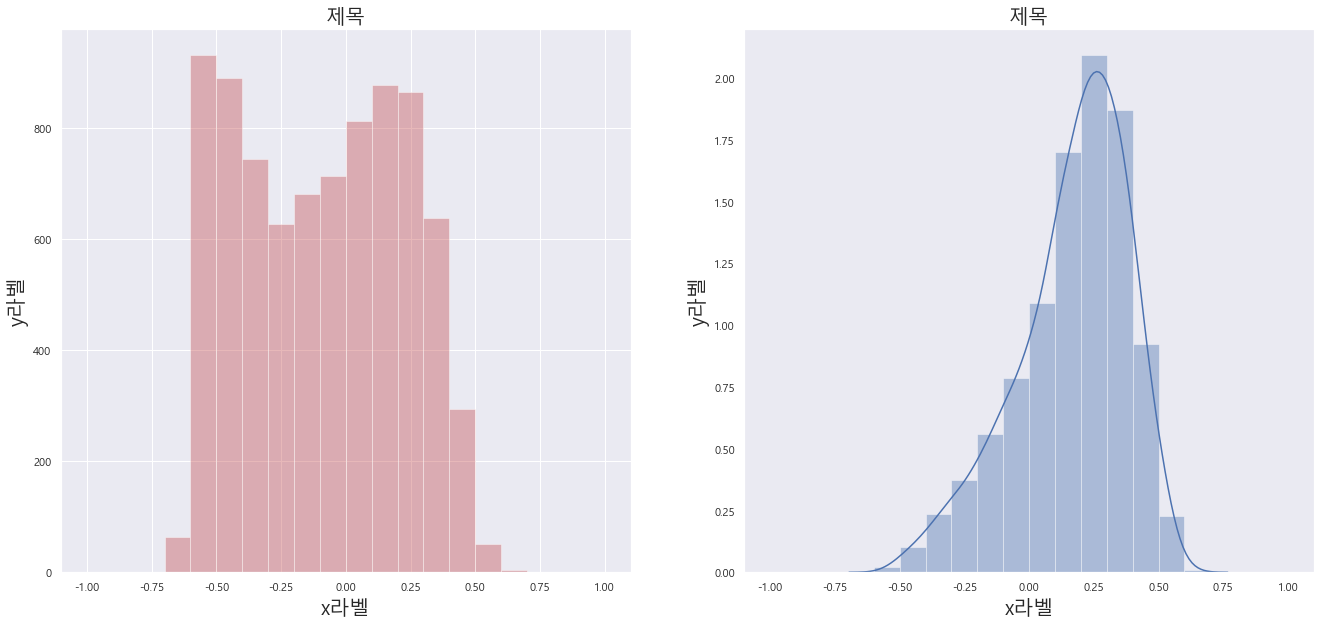

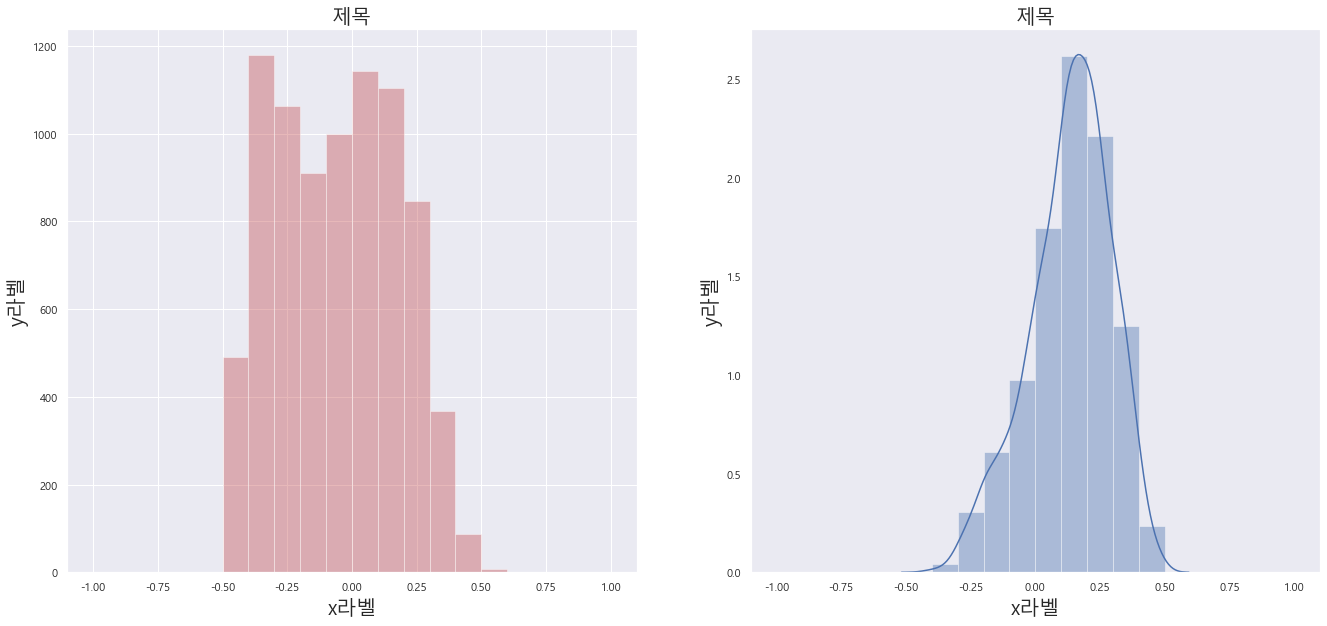

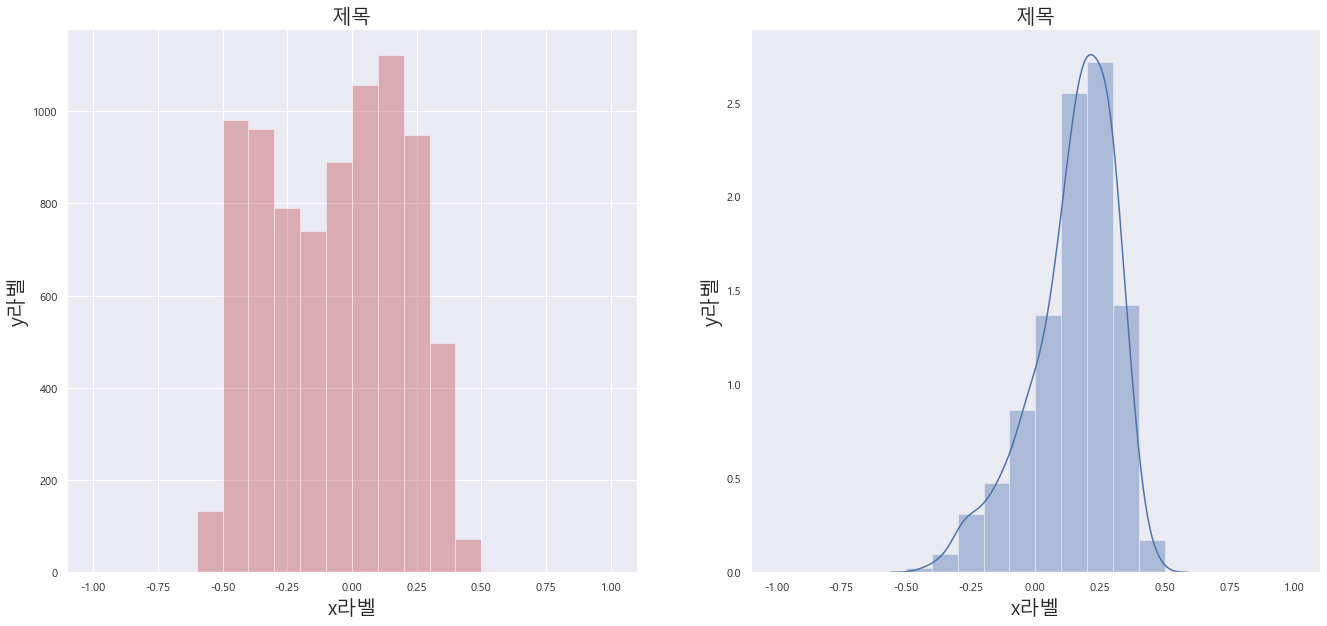

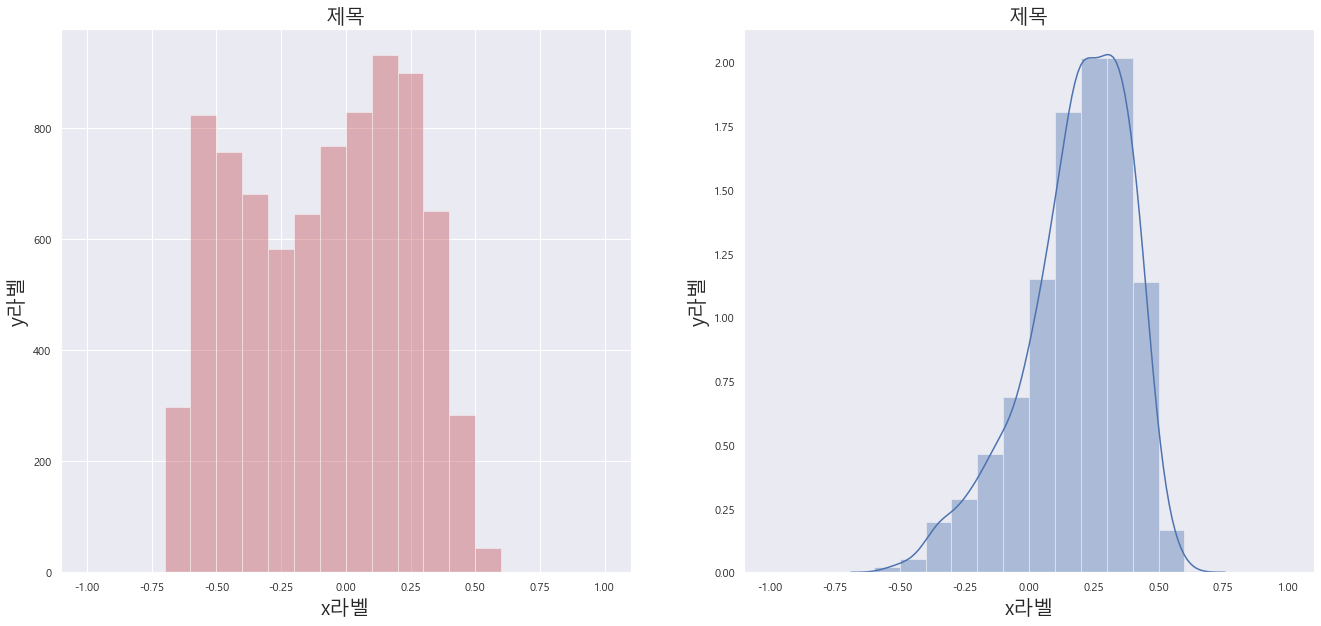

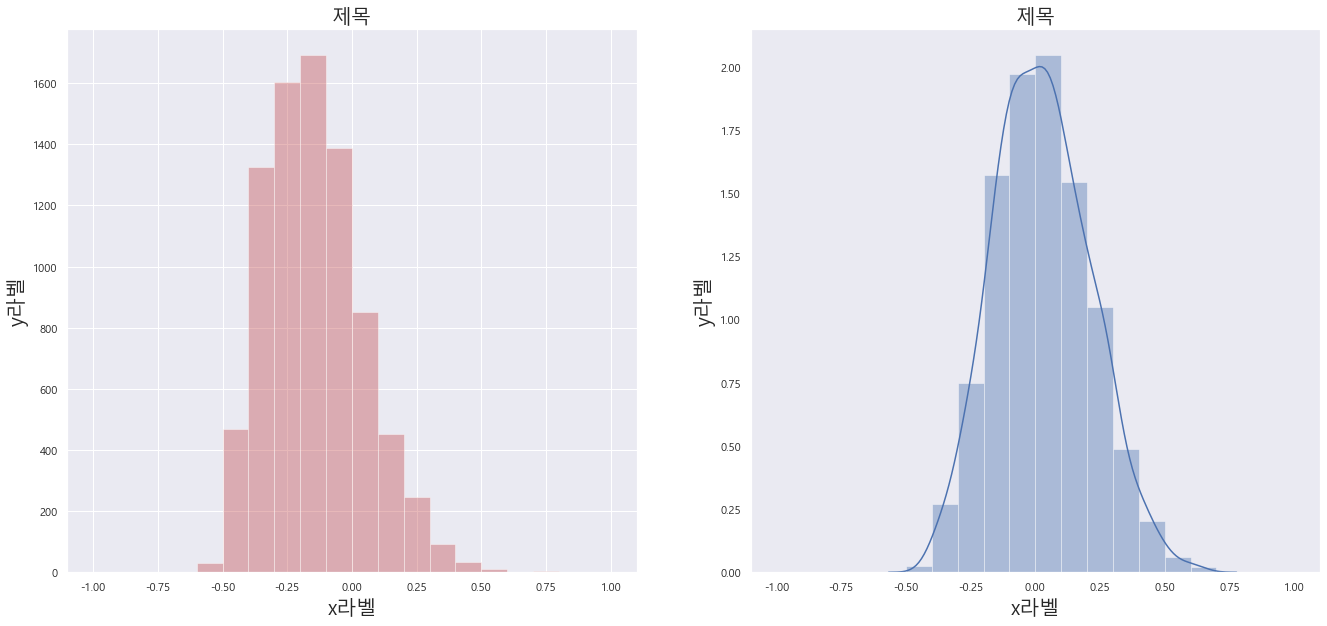

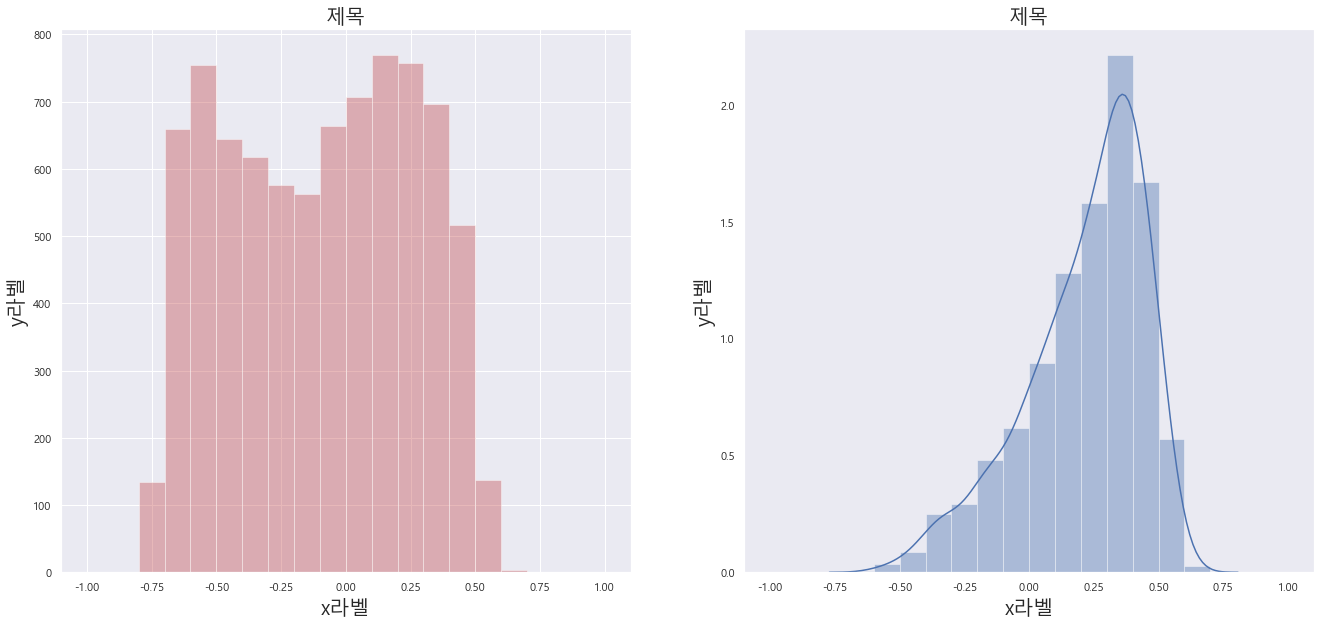

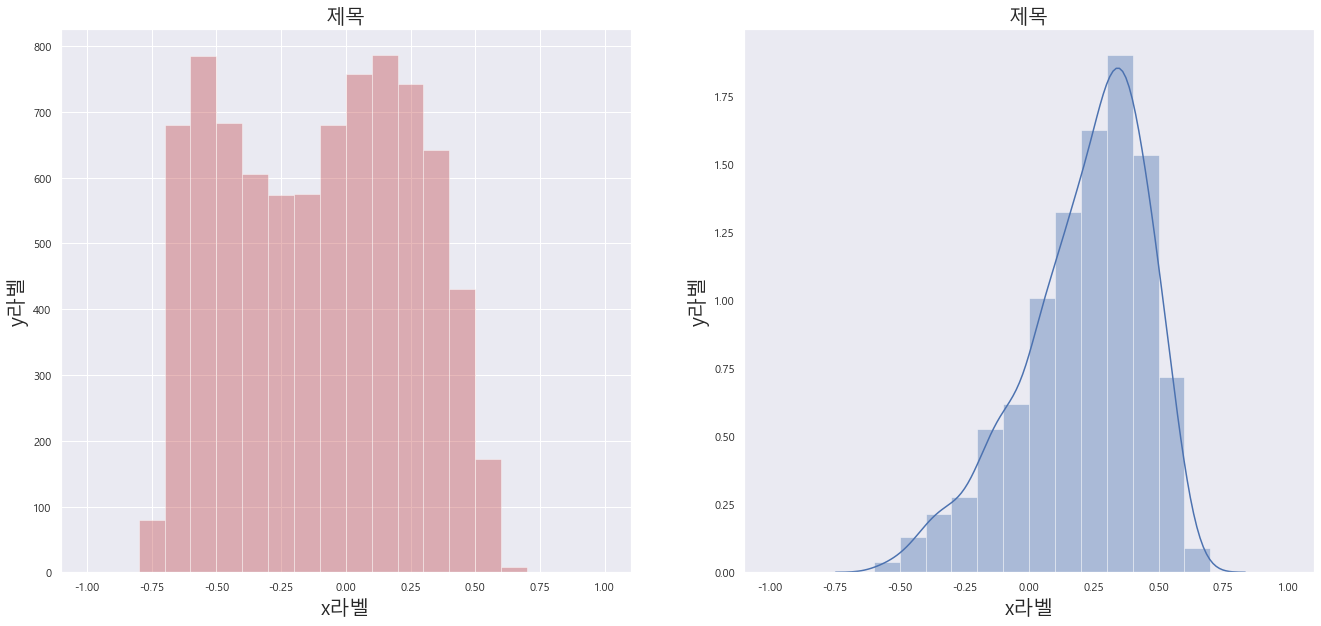

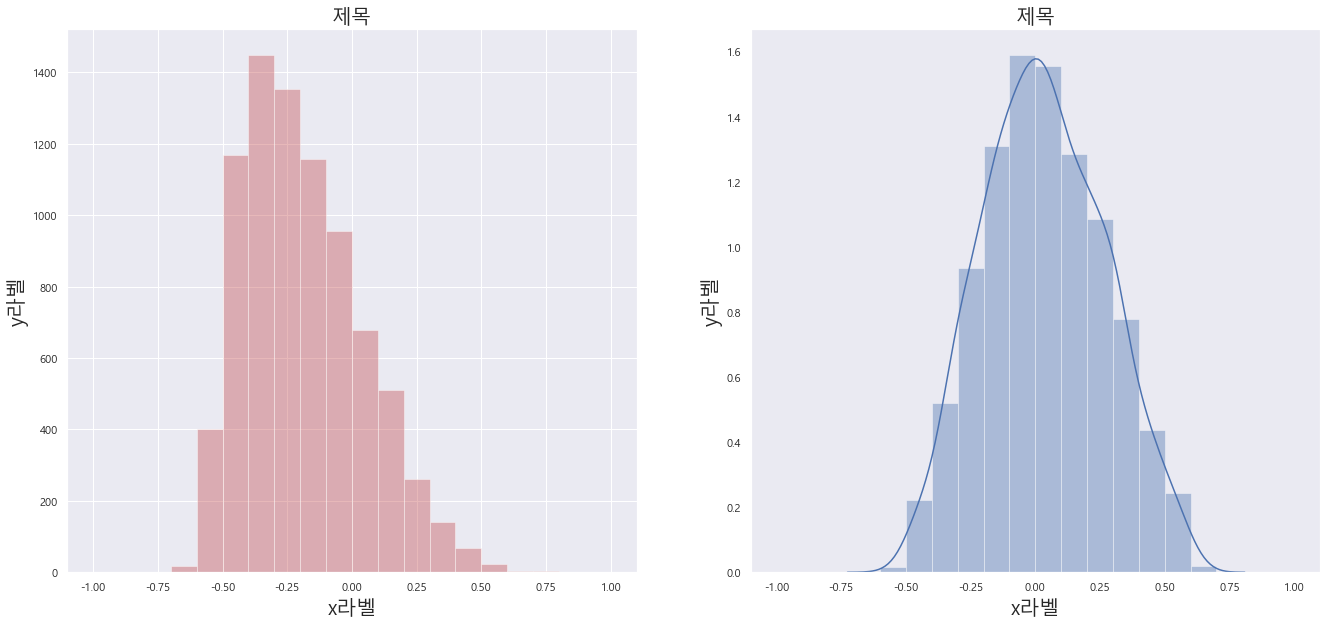

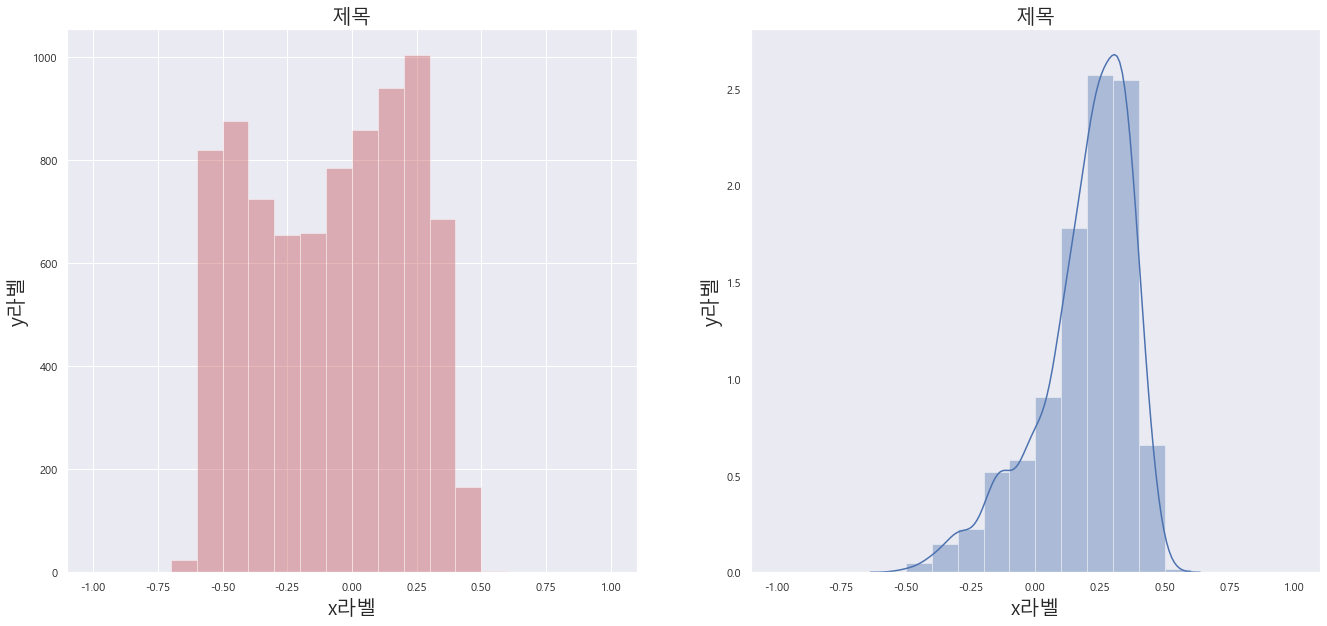

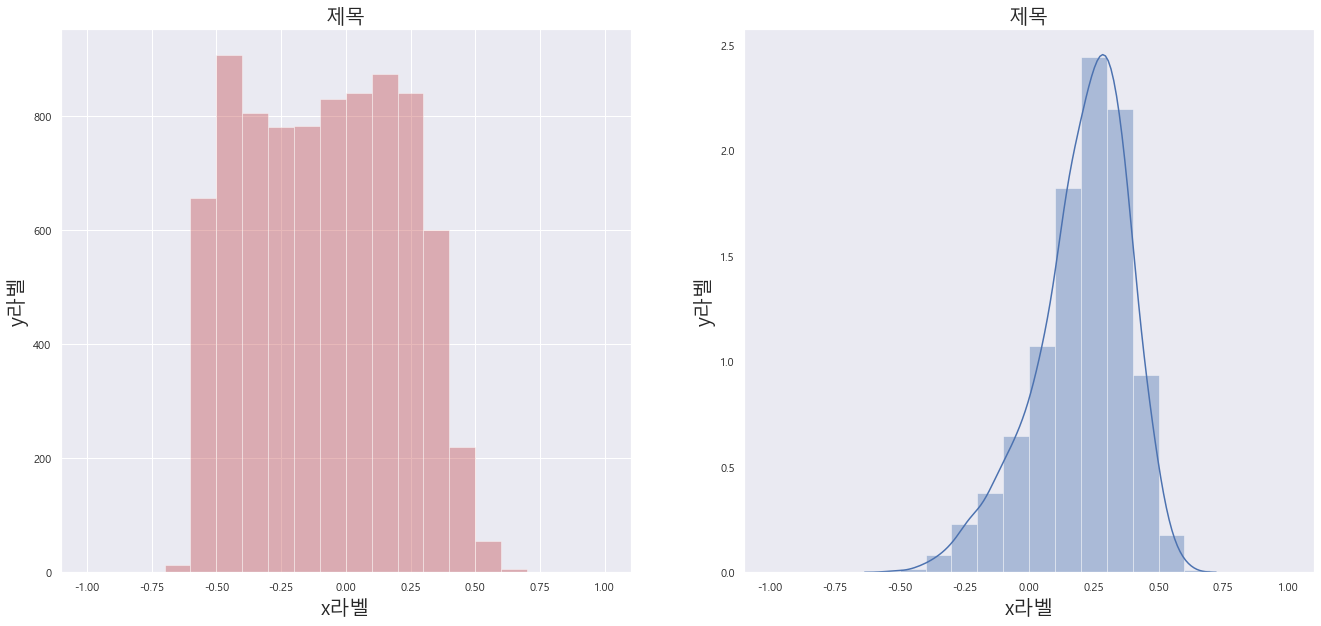

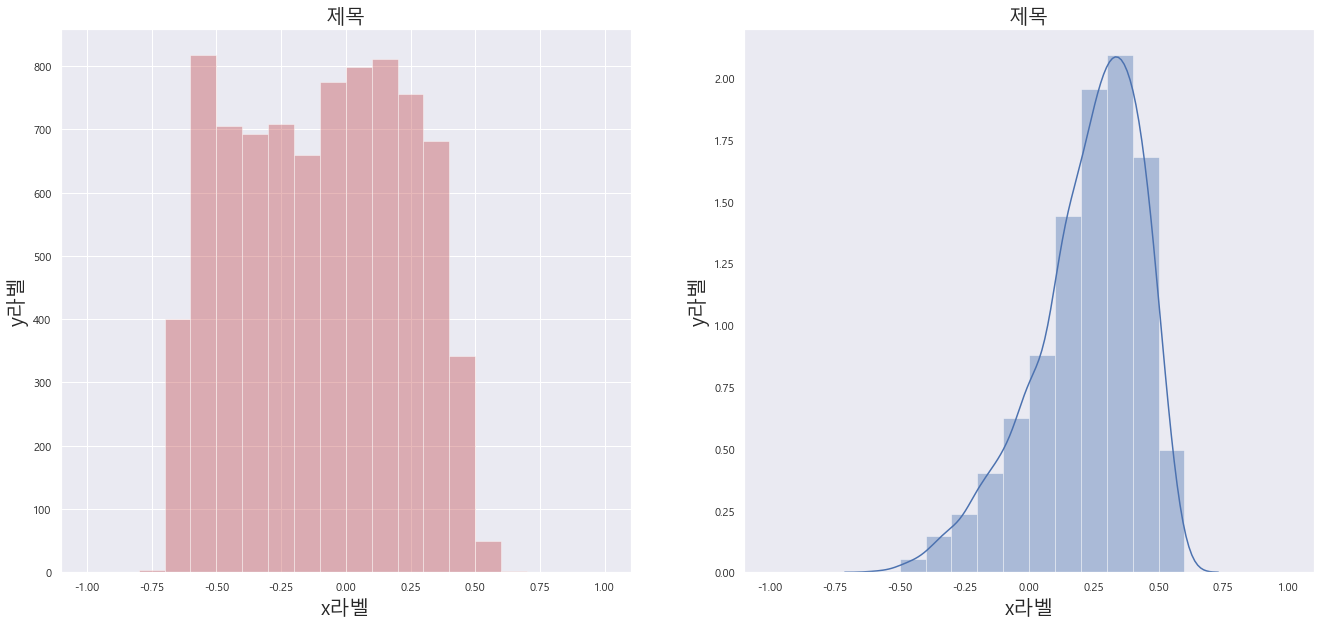

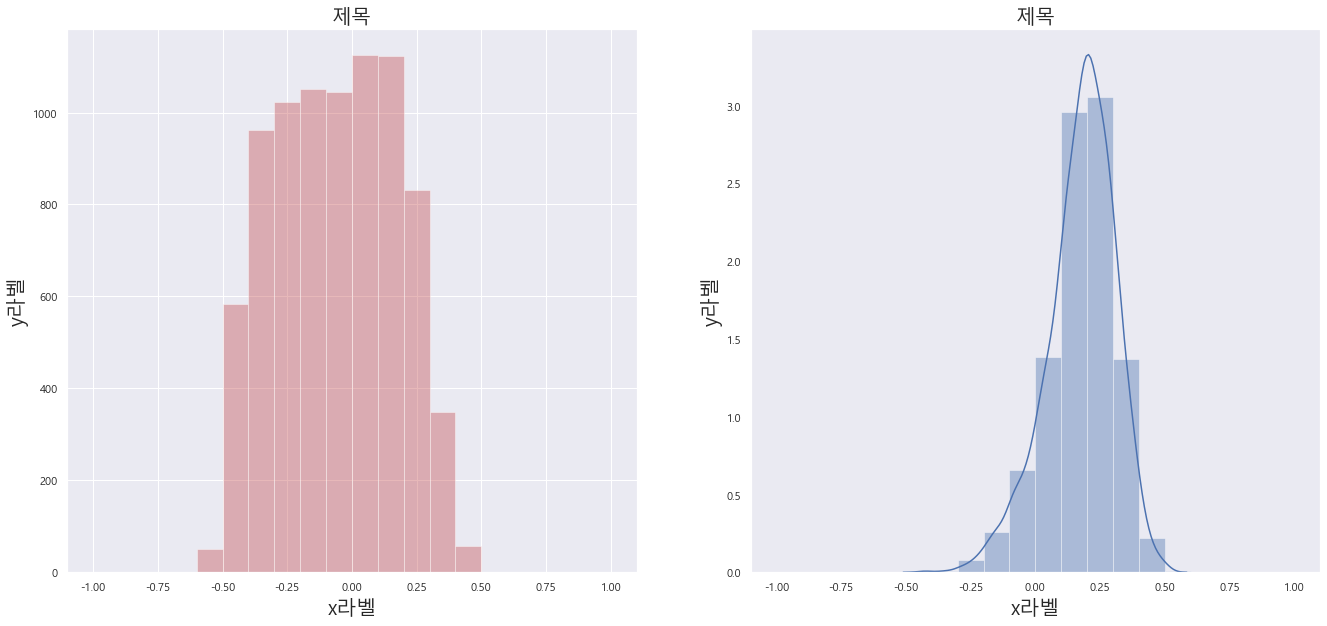

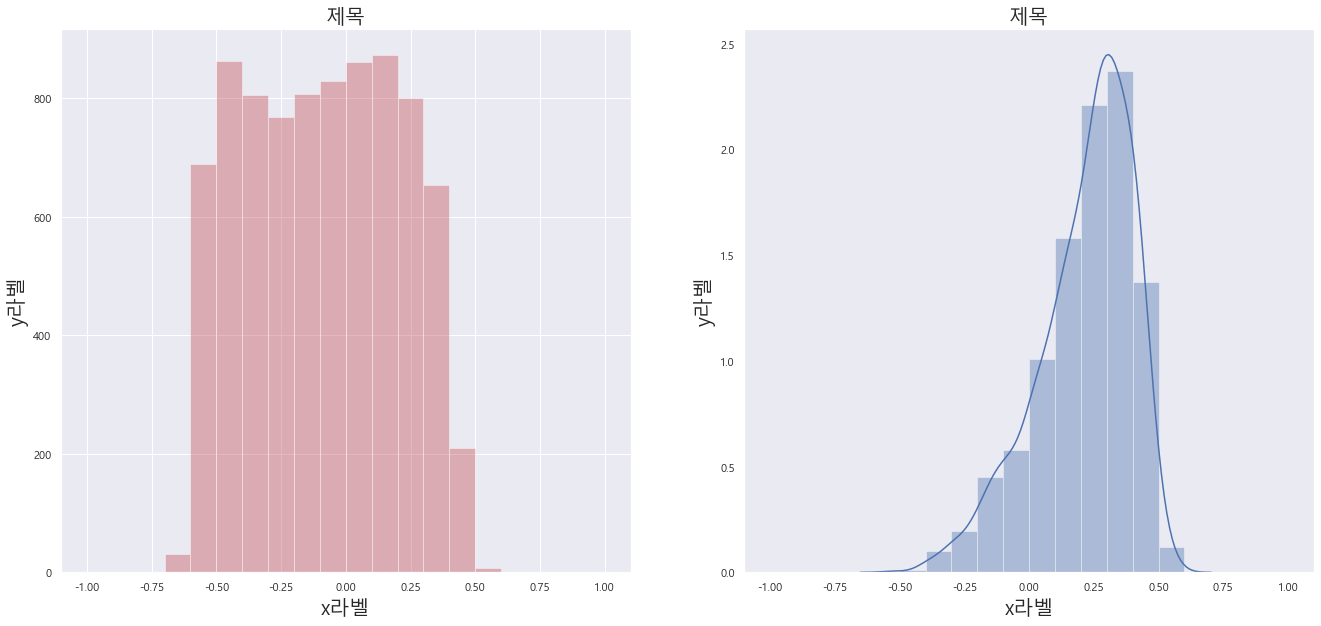

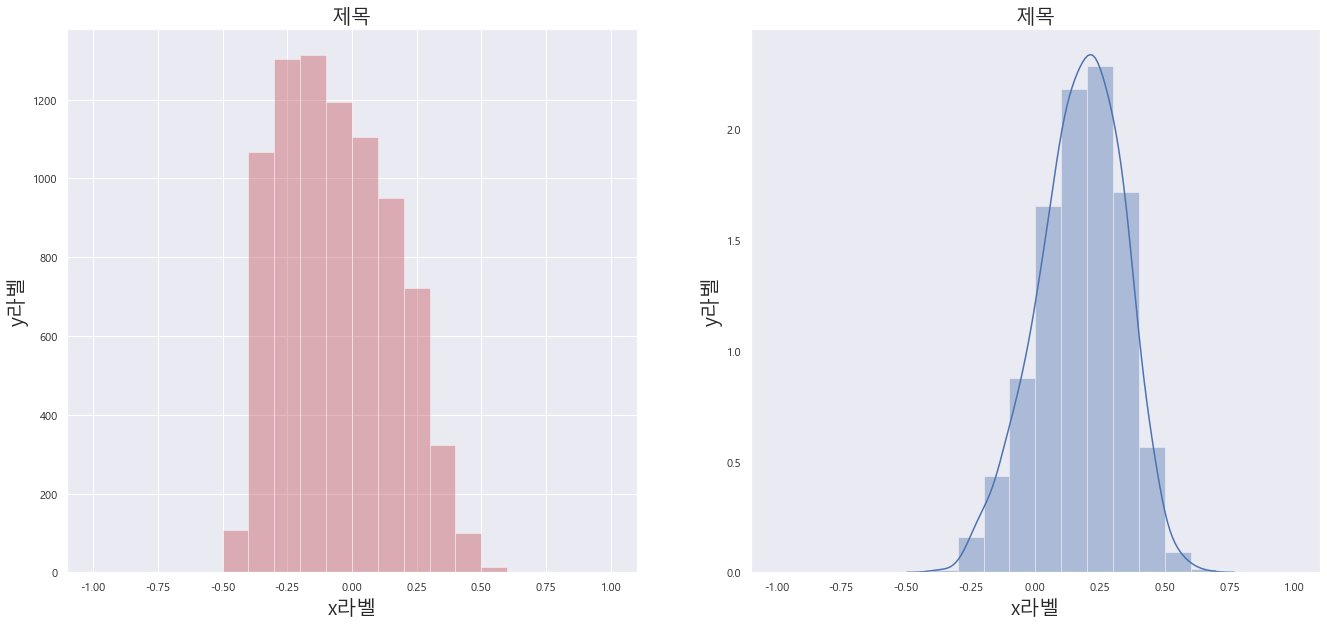

In [181]:
for i in hist_var:
    plt.figure(figsize=(20,10))
    # sns.set_style("darkgrid")
    # sns.set(font="AppleGothic",
    sns.set(font=font_name,
            rc={"axes.unicode_minus":False},
            style='darkgrid')

    plt.subplot(1,2,1)
    sns.distplot(data[i][r==0],bins=np.arange(-1,1.1,0.1),kde=False,color='r')
    plt.title("제목",fontsize=20)
    plt.xlabel("x라벨",fontsize=20)
    plt.ylabel("y라벨",fontsize=20)
    plt.grid(True)

    plt.subplot(1,2,2)
    sns.distplot(data[i][r==1],bins=np.arange(-1,1.1,0.1),kde=True,color='b')
    plt.title("제목",fontsize=20)
    plt.xlabel("x라벨",fontsize=20)
    plt.ylabel("y라벨",fontsize=20)
    plt.grid(False)

    # plt.savefig('test.jpg')
    plt.show()

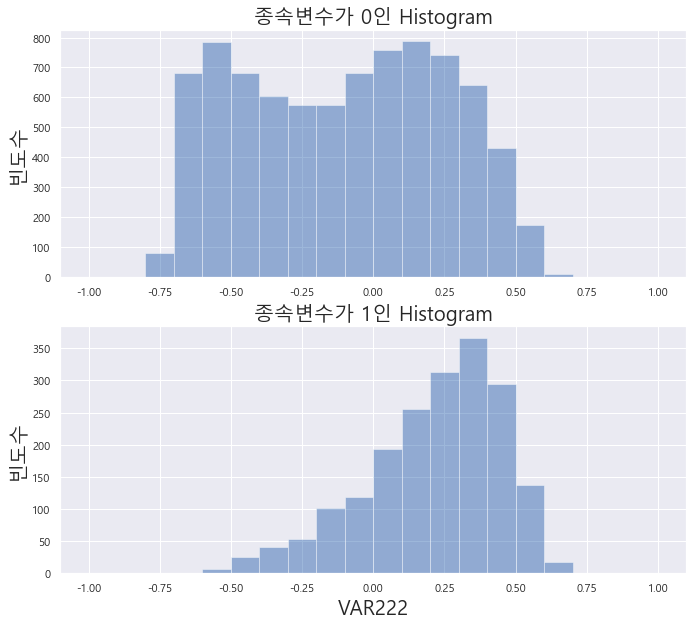

In [287]:
i = 'VAR222'
plt.figure(figsize=(10,10))
# sns.set_style("darkgrid")
# sns.set(font="AppleGothic",
sns.set(font=font_name,
        rc={"axes.unicode_minus":False},
        style='darkgrid')

plt.subplot(2,1,1)
sns.distplot(data[i][r==0],bins=np.arange(-1,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
plt.title("종속변수가 0인 Histogram",fontsize=20)
plt.xlabel("",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

plt.subplot(2,1,2)
sns.distplot(data[i][r==1],bins=np.arange(-1,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
plt.title("종속변수가 1인 Histogram",fontsize=20)
plt.xlabel("VAR222",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

plt.savefig('2-a_IQR_VAR222_히스토그램.jpg')
plt.show()

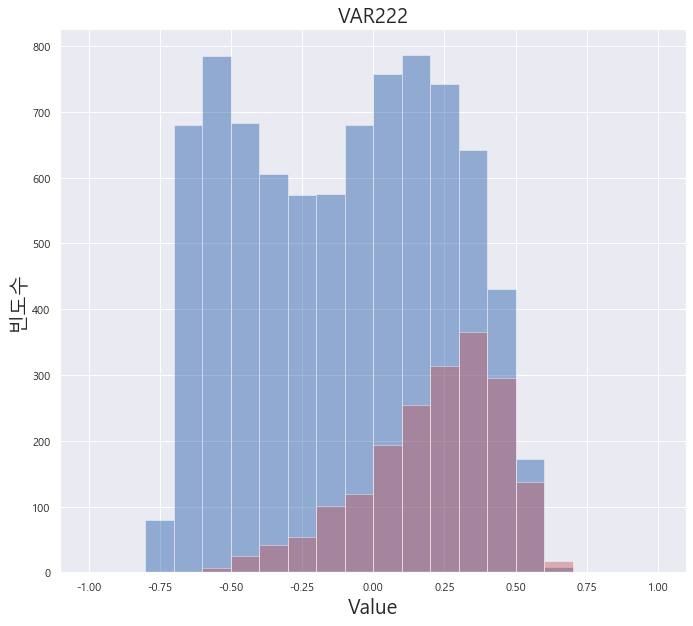

In [345]:
plt.figure(figsize=(10,10))
# sns.set_style("darkgrid")
# sns.set(font="AppleGothic",
sns.set(font=font_name,
        rc={"axes.unicode_minus":False},
        style='darkgrid')

sns.distplot(data[i][r==0],bins=np.arange(-1,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
sns.distplot(data[i][r==1],bins=np.arange(-1,1.1,0.1),kde=False,color='r')
plt.title("VAR222",fontsize=20)
plt.xlabel("Value",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

plt.savefig('2-a_IQR_VAR222_히스토그램.jpg')
plt.show()

In [192]:
df = data[['VAR100']].copy()

In [194]:
df['ans'] = 0

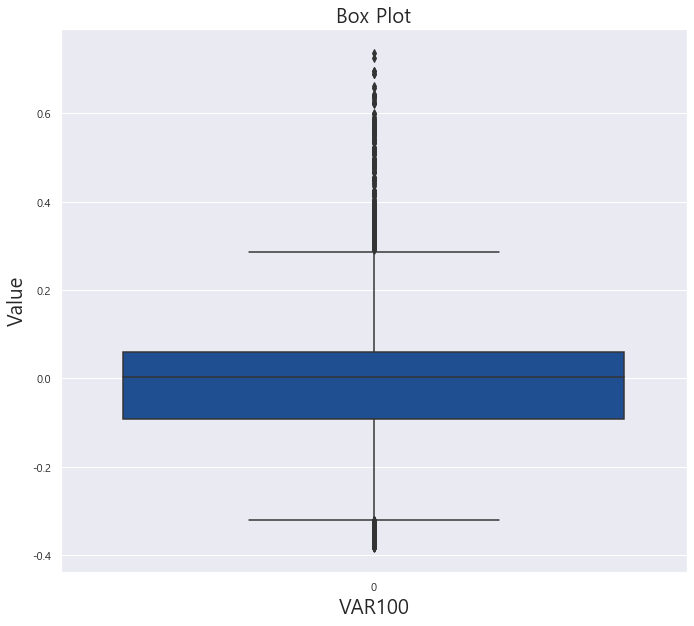

In [203]:
df.columns = ['val','ans']
plt.figure(figsize=(10,10))
sns.boxplot(x='ans',y='val',data=df,color=(12/255,76/255,163/255))
plt.title("Box Plot",fontsize=20)
plt.xlabel("VAR100",fontsize=20)
plt.ylabel("Value",fontsize=20)
plt.savefig('2-a_IQR_VAR100_Box_plot.jpg')
plt.show()

In [204]:
k_data = data[data['VAR222']<0][nume].copy()

In [206]:
k_data.index = range(len(k_data))

In [208]:
len(ans)

10124

In [209]:
k_ans = ans[data['VAR222']<0].copy()

In [210]:
k_ans.index = range(len(k_ans))

In [207]:
k_data

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR016,VAR017,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR068,VAR069,VAR072,VAR073,VAR074,VAR075,VAR076,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR095,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR108,VAR109,VAR110,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR125,VAR126,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR146,VAR147,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,var178,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,-0.01048,0.8360,0.37797,-0.10970,0.52032,0.3257,0.32632,0.7343,0.73494,0.48315,-0.54935,-0.51582,0.9484,0.2087,-0.53819,-0.11899,0.44315,0.08992,-0.16218,0.08997,0.39791,0.50289,0.41403,-0.28066,-0.06560,0.8768,-0.52176,-0.19172,0.40686,-0.45094,0.5963,-0.01491,0.39867,0.59189,-0.05797,-0.25150,0.0888,-0.44394,-0.17265,-0.10508,0.17664,0.40249,-0.08707,-0.17389,0.01949,-0.41371,-0.57989,-0.25015,-0.55024,0.18196,0.47434,0.25285,-0.60139,-0.42087,-0.58665,0.7663,-0.31002,0.19040,-0.08291,0.41910,0.85724,-0.05205,-0.13230,-0.14272,0.16981,-0.39866,-0.26419,-0.36103,0.13387,-0.03264,-0.11995,0.0024,0.11094,-0.07028,0.21423,-0.11218,0.54909,0.0090,-0.53048,-0.25263,0.54955,-0.50093,-0.09583,-0.11927,0.4319,-0.18817,0.8176,-0.34226,0.0045,0.56407,0.0541,-0.44085,-0.14813,-0.16575,-0.31552,-0.62186,-0.45906,0.54508,0.2380,0.48795,-0.66442,-0.04858,-0.28477,-0.57074,0.72245,-0.14951,-0.52562,0.23849,-0.10762,0.01762,0.2073,-0.11506,0.21075,0.57361,-0.13187,-0.16340,-0.57855,0.9818,0.89507,0.17749,0.30447,-0.08241,-0.17625,0.62497,-0.38546,-0.38186,-0.17233,-0.08842,-0.44788,0.32553,-0.26615,0.15568,-0.51382,-0.36804,0.29669,-0.66209,-0.32855,0.37890,-0.22324,0.70632,-0.20881,0.0027,-0.28891,-0.35566,-0.12787,0.0061,-0.05259,-0.04761,-0.39797,0.04336,-0.65610,0.0346,-0.11816,0.0032,0.01988,-0.01911,0.46788,-0.00393,-0.48004,-0.47893,-0.18220,0.53028,0.22730,-0.41783,0.9623,-0.13598,-0.11027,-0.10246,-0.66060,0.0015,-0.28843,0.43395,0.02417,-0.52420,0.79221,0.69491,-0.33027,-0.12411,-0.06027,-0.31830,-0.10428,-0.15064,-0.20617,-0.19684,0.17269,0.47581,-0.43263,0.10863,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
1,0.05194,0.7505,0.04611,-0.16512,0.07413,0.5322,0.26845,0.7327,0.32617,0.03258,-0.18421,-0.29766,0.4225,0.6836,-0.31400,-0.04615,-0.07140,-0.02279,-0.02005,0.12720,0.27797,0.31128,0.37237,-0.13443,-0.10367,0.2583,-0.24499,0.03160,0.10134,-0.22159,0.6729,-0.16091,0.24559,0.30509,0.22283,-0.03152,0.5389,-0.19985,-0.07626,-0.06083,-0.17060,-0.09068,-0.16749,-0.30956,-0.10185,0.01716,-0.30905,-0.05661,-0.22181,-0.04360,-0.04747,0.09572,-0.40219,-0.08172,-0.17516,0.8983,-0.22929,0.07662,0.14360,0.29884,0.38422,-0.05272,0.00887,-0.05435,-0.09668,-0.04198,0.16662,0.01695,0.22638,-0.24016,-0.06592,1.0000,0.05014,-0.00978,-0.12534,-0.04222,0.12378,0.0096,-0.23593,-0.31608,0.28716,-0.04388,-0.09469,-0.08755,0.0078,-0.06756,0.2017,0.10292,0.4801,0.18432,0.0082,-0.33476,-0.08501,-0.05914,-0.11368,-0.30790,0.03556,0.09271,0.8093,0.23394,-0.29573,0.12412,-0.23956,-0.10460,0.23879,-0.06739,-0.21509,-0.11496,-0.08487,0.04913,0.0045,-0.080

In [211]:
km = KMeans(n_clusters=9, init='k-means++',random_state=1192)
km_fit = km.fit(k_data)
km_res = km_fit.fit_predict(k_data)

In [214]:
k_ans[km_res==0].value_counts().sort_index()

0    870
1      2
5      5
6     21
7      9
8      6
Name: MRC_ID_DI, dtype: int64

In [222]:
df = pd.DataFrame(range(11))

In [224]:
for i in range(9):
    df[i] = k_ans[km_res==i].value_counts().sort_index()

In [225]:
df = df.fillna(0)

In [228]:
df.columns = [str(i+1)+"번째 군집" for i in range(9)]

In [229]:
df

,1번째 군집,2번째 군집,3번째 군집,4번째 군집,5번째 군집,6번째 군집,7번째 군집,8번째 군집,9번째 군집
0,870.0,262.0,480.0,525.0,483.0,695.0,587.0,260.0,500.0
1,2.0,0.0,0.0,0.0,2.0,4.0,17.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,4.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,0.0,2.0,0.0,16.0,0.0,2.0,0.0,0.0
6,21.0,0.0,8.0,3.0,57.0,6.0,31.0,0.0,4.0
7,9.0,1.0,9.0,2.0,50.0,8.0,4.0,0.0,1.0
8,6.0,0.0,3.0,3.0,20.0,7.0,27.0,0.0,0.0
9,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0


In [236]:
for i in range(9):
    df.iloc[:,i] = df.iloc[:,i].astype(int)

In [237]:
df

,1번째 군집,2번째 군집,3번째 군집,4번째 군집,5번째 군집,6번째 군집,7번째 군집,8번째 군집,9번째 군집
0,870,262,480,525,483,695,587,260,500
1,2,0,0,0,2,4,17,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,1,0,4,0,2,0,0
4,0,0,0,0,0,0,0,0,0
5,5,0,2,0,16,0,2,0,0
6,21,0,8,3,57,6,31,0,4
7,9,1,9,2,50,8,4,0,1
8,6,0,3,3,20,7,27,0,0
9,0,0,1,0,5,0,0,0,0


In [241]:
df.columns

Index(['1번째 군집', '2번째 군집', '3번째 군집', '4번째 군집', '5번째 군집', '6번째 군집', '7번째 군집',
       '8번째 군집', '9번째 군집'],
      dtype='object')

In [242]:
[df.columns[i] for i in [0,2,3,4,5,6]]

['1번째 군집', '3번째 군집', '4번째 군집', '5번째 군집', '6번째 군집', '7번째 군집']

In [244]:
df = df.drop(columns=[df.columns[i] for i in [0,2,3,4,5,6]]).copy()

In [247]:
df['MRC_ID_DI'] = df.index

In [249]:
df.index = df['MRC_ID_DI']

In [252]:
df = df.drop(columns = ['MRC_ID_DI']).copy()

In [253]:
df

,2번째 군집,8번째 군집,9번째 군집
MRC_ID_DI,,,
0,262,260,500
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,4
7,1,0,1
8,0,0,0


In [254]:
df.iloc[1,0] = 1
df.iloc[1,2] = 5

In [256]:
df.head(2).to_csv

,2번째 군집,8번째 군집,9번째 군집
MRC_ID_DI,,,
0,262,260,500
1,1,0,5


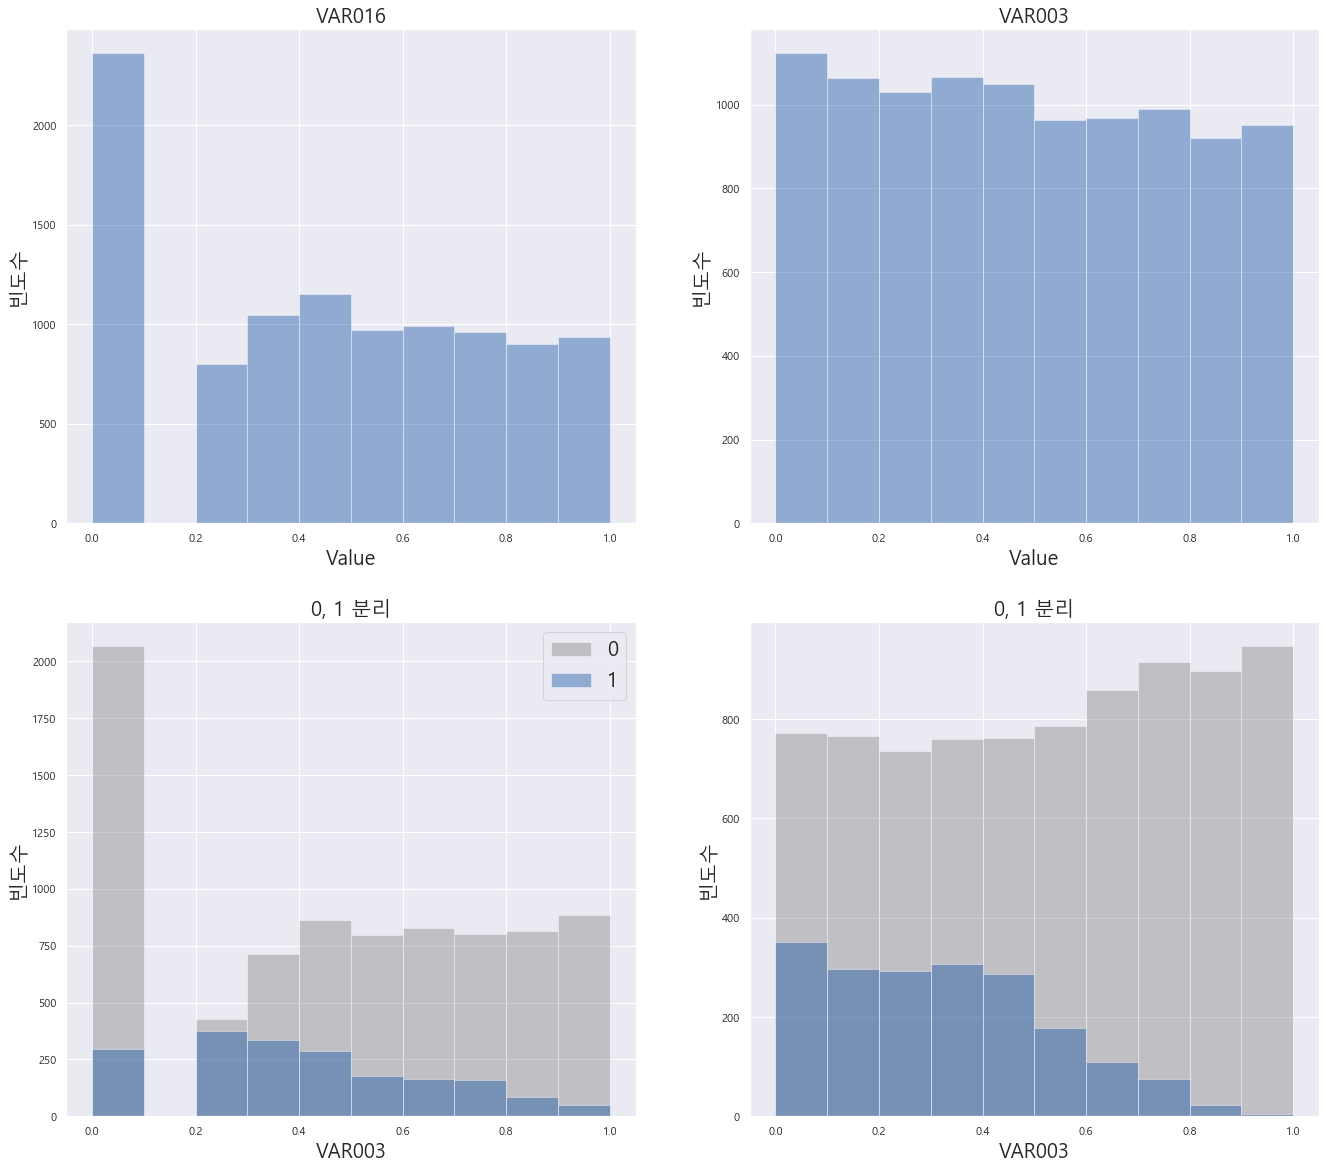

In [333]:
plt.figure(figsize=(20,20))
# sns.set_style("darkgrid")
# sns.set(font="AppleGothic",
sns.set(font=font_name,
        rc={"axes.unicode_minus":False},
        style='darkgrid')

plt.subplot(2,2,1)
sns.distplot(data['VAR016'],bins=np.arange(0,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
plt.title("VAR016",fontsize=20)
plt.xlabel("Value",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

plt.subplot(2,2,2)
sns.distplot(data['VAR003'],bins=np.arange(0,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
plt.title("VAR003",fontsize=20)
plt.xlabel("Value",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

plt.subplot(2,2,3)
sns.distplot(data['VAR016'][r==0],bins=np.arange(0,1.1,0.1),kde=False, color=(0.5,0.5,0.5), label='0')
sns.distplot(data['VAR016'][r==1],bins=np.arange(0,1.1,0.1),kde=False, color=(12/255,76/255,163/255), label='1')
plt.title("0, 1 분리",fontsize=20)
plt.xlabel("VAR003",fontsize=20)
plt.ylabel("빈도수",fontsize=20)

plt.grid(True)

plt.subplot(2,2,4)
sns.distplot(data['VAR003'][r==0],bins=np.arange(0,1.1,0.1),kde=False,color=(0.5,0.5,0.5))
sns.distplot(data['VAR003'][r==1],bins=np.arange(0,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
plt.title("0, 1 분리",fontsize=20)
plt.xlabel("VAR003",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

# plt.savefig('2-a_IQR_VAR222_히스토그램.jpg')
plt.show()

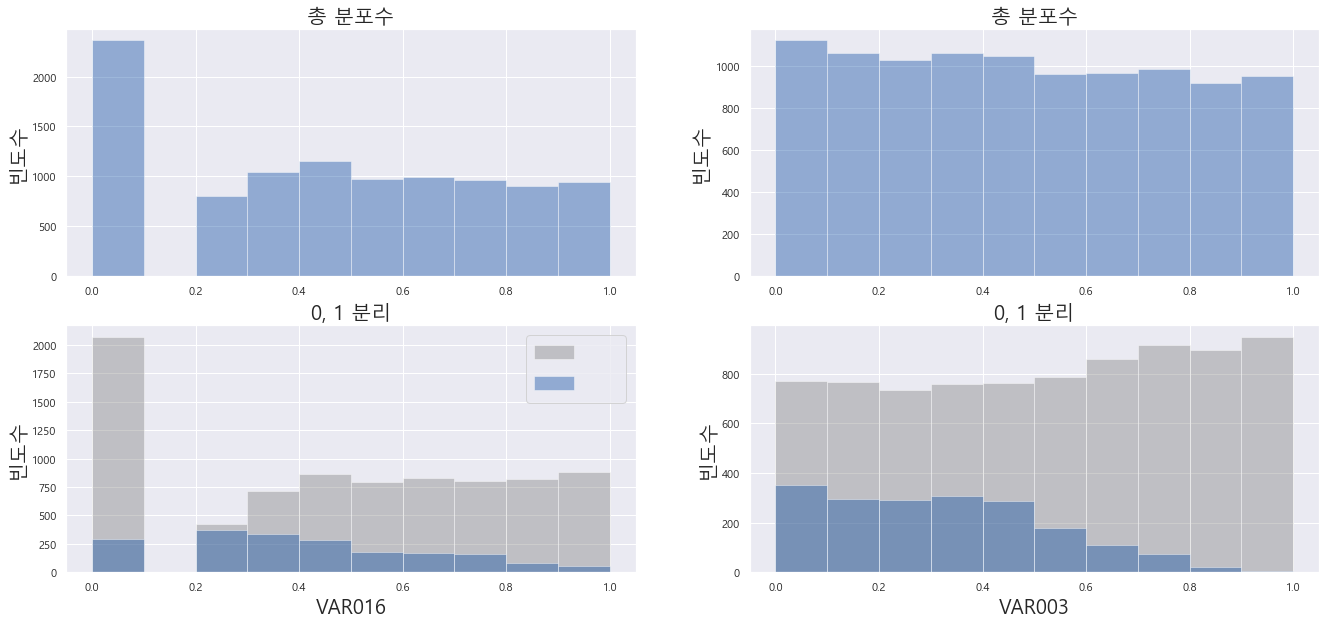

In [336]:
plt.figure(figsize=(20,10))
# sns.set_style("darkgrid")
# sns.set(font="AppleGothic",
sns.set(font=font_name,
        rc={"axes.unicode_minus":False},
        style='darkgrid')

plt.subplot(2,2,1)
sns.distplot(data['VAR016'],bins=np.arange(0,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
plt.title("총 분포수",fontsize=20)
plt.xlabel("",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

plt.subplot(2,2,2)
sns.distplot(data['VAR003'],bins=np.arange(0,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
plt.title("총 분포수",fontsize=20)
plt.xlabel("",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

plt.subplot(2,2,3)
sns.distplot(data['VAR016'][r==0],bins=np.arange(0,1.1,0.1),kde=False, color=(0.5,0.5,0.5), label='    ')
sns.distplot(data['VAR016'][r==1],bins=np.arange(0,1.1,0.1),kde=False, color=(12/255,76/255,163/255), label='    ')
plt.title("0, 1 분리",fontsize=20)
plt.xlabel("VAR016",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.legend(prop={'size': 20})
plt.grid(True)

plt.subplot(2,2,4)
sns.distplot(data['VAR003'][r==0],bins=np.arange(0,1.1,0.1),kde=False,color=(0.5,0.5,0.5))
sns.distplot(data['VAR003'][r==1],bins=np.arange(0,1.1,0.1),kde=False,color=(12/255,76/255,163/255))
plt.title("0, 1 분리",fontsize=20)
plt.xlabel("VAR003",fontsize=20)
plt.ylabel("빈도수",fontsize=20)
plt.grid(True)

plt.savefig('3_범주화.jpg')
plt.show()

In [290]:
cor_data = data.copy()

In [291]:
cor_data['Target'] = r.copy()

In [297]:
cor_df = cor_data.corr().loc[['VAR003','VAR016'],['Target']].copy()

In [299]:
cor_df.columns = ['종속변수와의 상관계수']

In [301]:
cor_df

,종속변수와의 상관계수
VAR003,-0.273248
VAR016,-0.079615


In [302]:
from sklearn.decomposition import PCA

In [303]:
pca = PCA()
pca.fit_transform(data[nume])
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

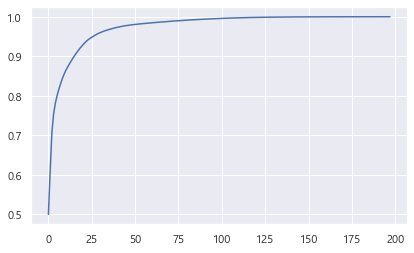

In [310]:
plt.plot(exp_var_cumul)

In [305]:
pca6 = PCA(6)
pri_comp = pca6.fit_transform(data[nume])
pca_df = pd.DataFrame(data=pri_comp,columns=['p' + str(i) for i in range(1,7)])

In [312]:
pca_data = pd.read_csv("pca.dat")

In [313]:
pca_data

,n_components,auc,counts
0,0.600,0.764706,2
1,0.601,0.764706,2
2,0.602,0.764706,2
3,0.603,0.764706,2
4,0.604,0.764706,2
...,...,...,...
295,0.895,0.832098,16
296,0.896,0.832098,16
297,0.897,0.832098,16
298,0.898,0.832098,16


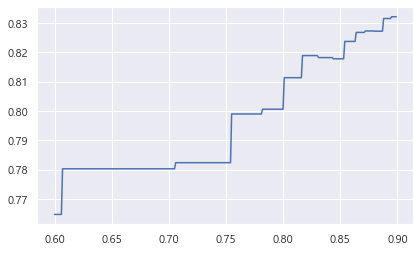

In [315]:
plt.plot(pca_data['n_components'],pca_data['auc'])

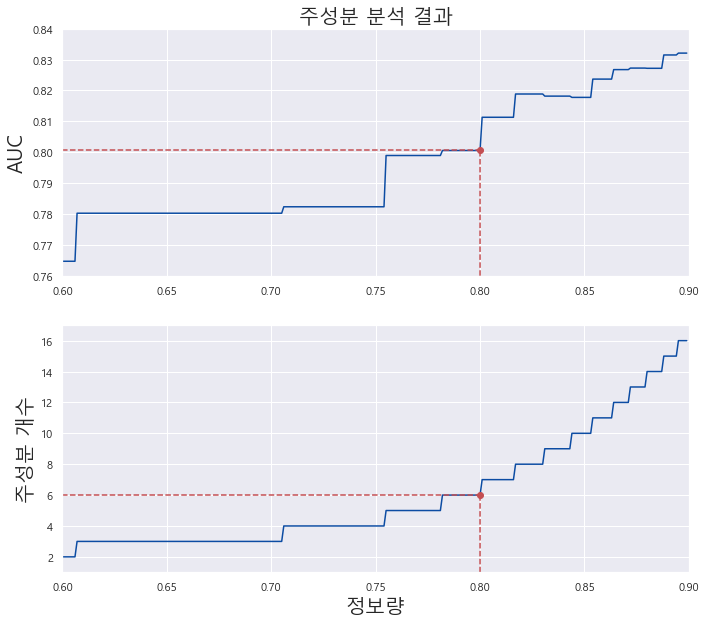

In [369]:
y1 = np.arange(0.76,0.800569,0.000001)
x1 = [0.8]*len(y1)

x2 = np.arange(0.6,0.8,0.001)
y2 = [0.800568]*len(x2)

y3 = np.arange(1,6.001,0.001)
x3 = [0.8]*len(y3)

x4 = np.arange(0.6,0.8,0.001)
y4 = [6]*len(x4)

plt.figure(figsize=(10,10))
# sns.set_style("darkgrid")
# sns.set(font="AppleGothic",
sns.set(font=font_name,
        rc={"axes.unicode_minus":False},
        style='darkgrid')

plt.subplot(2,1,1)
plt.plot(pca_data['n_components'],pca_data['auc'],color=(12/255,76/255,163/255))
plt.plot(x1,y1,'--',color='r')
plt.plot(x2,y2,'--',color='r')
plt.plot(x1[0],y2[0],'o',color='r')
plt.xlim(0.6,0.9)
plt.ylim(0.76,0.84)
plt.title("주성분 분석 결과",fontsize=20)
plt.xlabel("",fontsize=20)
plt.ylabel("AUC",fontsize=20)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(pca_data['n_components'],pca_data['counts'],color=(12/255,76/255,163/255))
plt.plot(x3,y3,'--',color='r')
plt.plot(x4,y4,'--',color='r')
plt.plot(x3[0],y4[0],'o',color='r')
plt.title("",fontsize=20)
plt.xlim(0.6,0.9)
plt.ylim(1,17)
plt.xlabel("정보량",fontsize=20)
plt.ylabel("주성분 개수",fontsize=20)
plt.grid(True)

plt.savefig('3-1_c_주성분분석.jpg')
plt.show()

In [374]:
mrc_info['총 개수'] = ans.value_counts().sort_index()

In [375]:
mrc_info

,Category,총 개수
MRC_ID_DI,,
0,미이용,8200
1,홈쇼핑,85
2,종합물,14
3,종합몰,32
4,전문몰,11
5,종합몰,143
6,홈쇼핑,554
7,오픈마켓_소셜,661
8,홈쇼핑,337


In [373]:
ans.value_counts().sort_index()

0     8200
1       85
2       14
3       32
4       11
5      143
6      554
7      661
8      337
9       59
10      28
Name: MRC_ID_DI, dtype: int64

In [376]:
r.value_counts()

0    8200
1    1924
Name: MRC_ID_DI, dtype: int64